# 데이터 시각화

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
# 데이터 불러오기
train_data, test_data = tf.keras.datasets.mnist.load_data()

In [18]:
# Train data shape
print('Shape of the Image Training Data is ' + str(train_data[0].shape))
print('Shape of the Image Test Data is ' + str(test_data[0].shape))

Shape of the Image Training Data is (60000, 28, 28)
Shape of the Image Test Data is (10000, 28, 28)


In [19]:
# Test data shape
print('Shape of the Image Training label is ' + str(train_data[1].shape))
print('Shape of the Image Test label is ' + str(test_data[1].shape))

Shape of the Image Training label is (60000,)
Shape of the Image Test label is (10000,)


In [ ]:
# train data 이미지

In [22]:
index = np.random.randint(0,len(train_data), size = 1)
random_image = train_data[0][index]
random_label = train_data[1][index]
random_image = random_image.reshape([28,28])

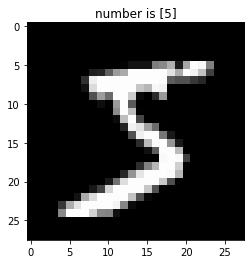

In [28]:
plt.gray()
plt.imshow(random_image)
plt.title('number is ' + str(random_label))
plt.show()

------

# 데이터 전처리

In [2]:
import pandas as pd

In [3]:
df0 =  pd.read_csv('adult.data')

In [17]:
df2 = pd.read_csv('adult.data', names = ['age', 'workclass', 'fnlwgt', 
                                        'education', 'education_num', 'marital-status',
                                        'occupation', 'relationship', 'race', 'sex',
                                        'capital-gain', 'capital-loss', 'hours-per-week',
                                        'native-country', 'Label'])

In [18]:
mappings = {}

col_names = ['age', 'workclass', 'fnlwgt','education', 'education_num', 'marital-status',
            'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week','native-country', 'Label']


In [21]:
df2['workclass'].dtype

dtype('O')

In [22]:
col_name = 'workclass'

In [23]:
df2[col_name] = df2[col_name].astype('category')

In [27]:
pd.Series(df2[col_name]).factorize()

(array([0, 1, 2, ..., 2, 2, 6]),
 CategoricalIndex([' State-gov', ' Self-emp-not-inc', ' Private',
                   ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc',
                   ' Without-pay', ' Never-worked'],
                  categories=[' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ...], ordered=False, dtype='category'))

In [28]:
for col_name in col_names:
    if df2[col_name].dtype == 'object':
        df2[col_name] = df2[col_name].astype('category')
        # category를 숫자화한다.
        df2[col_name], mapping_index = pd.Series(df2[col_name]).factorize()
        mappings[col_name] = {}
             
        for i in range(len(mapping_index.categories)):
            # 각 숫자와 Category는 index화 한다.
            mappings[col_name][i] = mapping_index.categories[i]
             
    else:
        mappings[col_name] = 'continuous'

----

# 비정상 데이터

* 다변량 방법

어떤 단일한 중간값에서 멀리 떨어져 있는 값을 제거하는데 초점을 둔다.
평가 계량기준을 세척 파라미터라 부르고, 이 파라미터는 분포에서 떼어 낼 값으로 정의한다.
세척 파라미터를 공격적으로 선택하면 다양한 데이터가 제거될 수도 있고, 너무 크게 잡으면 분포에 대한 내용이 크게 변하지 않는다.

In [32]:
from numpy import linspace, exp
from numpy.random import randn
from scipy.interpolate import UnivariateSpline

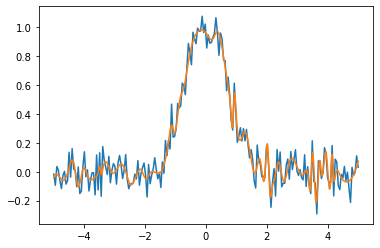

In [37]:
x = linspace(-5, 5, 200)
y = exp(-x**2) + randn(200)/10
s = UnivariateSpline(x, y, s = 1)
xs = linspace(-5, 5, 1000)
ys = s(xs)
plt.plot(x,y,'-')
plt.plot(xs,ys)
plt.show()

-------

# 데이터 균형조절

* 표본추출

데이터 분포를 수정하여 데이터의 균형을 잡는 것이다.

(1) 무작위 과소 표본추출
본포의 다수 계급을 무작위 과소 표본추출을 해서, 예측하려는 다른 소수 계급의 분포와 일치시킨다.

In [ ]:
b

------

# 데이터 증식

In [42]:
import imgaug as ia
from imgaug import augmenters as iaa

In [43]:
ia.seed(1)

In [71]:
images = np.array([ia.quokka(size = (64,64)) for _ in range(100)], dtype = np.uint8)

In [77]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # 수평으로 뒤집기
    iaa.Crop(percent = (0,0.1)), # 임의로 그림 따내기
    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma = (0,0.5))), # 50%를 가우스 블러 처리
    iaa.AdditiveGaussianNoise(loc = 0, scale = (0.0,0.05*255), per_channel = 0.5), # 가우시안 잡음 추가
    iaa.Multiply((0.8, 1.2), per_channel = 0.2), # 일부 이미지는 어둡거나 밝게
    iaa.Affine(
        scale = {'x' : (0.5, 1.5), 'y' : (0.5, 1.5)},
        translate_percent = {'x' : (-0.5, 0.5), 'y' : (-0.5, 0.5)},
        rotate = (-10, 10),
        shear = (-10, 10))
], random_order = True)

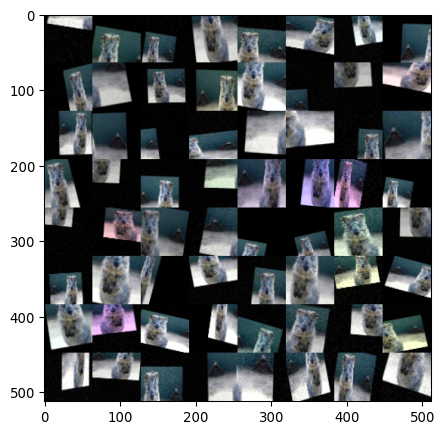

In [80]:
images_aug = seq(images = images)
seq.show_grid(images[0], cols = 8, rows = 8)